Foi escolhido analisar os dados sobre o Titanic. A primeira alteração foi criar um Dataframe em que a idade foi substituida por um valor binário booleano que marca se é verdade se a pessoa em questão tem mais de 12 anos. Isso foi feito para se analisar diferenças entre maiores e menores de idade. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy


Titanic_data_raw=pd.read_csv('titanic_data.csv')
Titanic_data_Maior_idade=Titanic_data_raw
#altero o modo de medir idade para poder identificar maior de idade e menores de idade
Titanic_data_Maior_idade['Age']=Titanic_data_Maior_idade['Age']>12
Titanic_data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,True,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,True,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,True,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,True,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,True,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,False,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,True,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,False,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,True,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,True,1,0,237736,30.0708,NaN,C


Pelo site do Kaggle temos: Pclass a classe social(varia de primeira a terceira), a coluna SibSp significa relações de esposo(a) e irmãos no navio. Parch é o numero de parentes na forma(Pais, mães e filhos).
      A idade se terminar em 0.5 é estimada(idades menores de 1 tb são fracionarias). Embarked é o porto em q a pessoa embarcou. Os demais dados são triviais. 

Algumas perguntas iniciais a serem feitas são:

1º Mulheres e crianças realmente tiveram vantagens na chance de sobrevivência?(Mulheres e crianças primeiro) 

2º Qual relação entre poder financeiro(representada pela classe) e sobrevivência?

Como vou analisar a taxa de sobrevivência varias vezes. Criarei funcões genéricas para isso.

In [2]:
#as pessoas maiores de 18 ficarão marcadas como True
def media(Variavel_Independente):
        return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].mean()

In [3]:
print media('Sex')
print media('Age')
print media('Pclass')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Age
False    0.373984
True     0.387597
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


A média de mulheres está muito maior que as de homem. O que mostra que sobreviveram mais mulheres. Já as crianças também viveram mais. Nota-se também a progressão infelizmente esperada nas classes sociais. Porém eu quero saber qual a chance de isto ter sido só um desvio estátistico. para tanto farei um teste t.

Considerarei durante o teste que meus dados são só uma amostra pois irei comparar com uma população ficticia para ver a chance de o que aconteceu ter sido puramente aleatório. Usarei o $\alpha=0.05$ como meu crivo de algo aleatório.


In [4]:
def desvio_padrao(Variavel_Independente):
    return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].std(ddof=1)    
def Tamanho_Amostra(Variavel_Independente):    
    return (Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'].count()


In [5]:
print desvio_padrao('Sex')
print desvio_padrao('Age')
print desvio_padrao('Pclass')

Sex
female    0.438211
male      0.391775
Name: Survived, dtype: float64
Age
False    0.484846
True     0.487580
Name: Survived, dtype: float64
Pclass
1    0.484026
2    0.500623
3    0.428949
Name: Survived, dtype: float64


Nota-se um desvio padrão maior nas mulheres. Mas a informação importante irei descobrir ao fazer o teste t.

Minha hipótese nula é de que não haverá diferença entre a sobrevivência das mulheres e a dos homens. $\mu_H=\mu_M$ que pode ser reescrita como $\mu_H-\mu_M=0$ já a hipótese alternativa é $\mu_H-\mu_M \neq 0$. Aonde os $\mu$ representam a população de homens e mulheres salvas. Usarei two-sided tail por considerar não ter motivos iniciais para ir pra nenhum dos lados.

In [6]:
#poderia ter sido usada a seguinte função simplesmente:
#scipy.stats.ttest_ind(Titanic_data_Maior_idade.groupby('Age').get_group(False)['Survived'],\
#Titanic_data_Maior_idade.groupby('Age').get_group(True)['Survived'], equal_var=False)
def variancia_pooled(Variavel_Independente,Alvo1,Alvo2):
    grouped_survived1=((Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived'])
    diff_media1=grouped_survived1.get_group(Alvo1)-media(Variavel_Independente)[Alvo1]
    grouped_survived2=(Titanic_data_Maior_idade.groupby(Variavel_Independente))['Survived']
    diff_media2=grouped_survived2.get_group(Alvo2)-media(Variavel_Independente)[Alvo2]    
    return ((diff_media1*diff_media1).sum()+(diff_media2*diff_media2).sum())/(Tamanho_Amostra(Variavel_Independente)[Alvo1]+Tamanho_Amostra(Variavel_Independente)[Alvo2]-2)                                                                          
                                                                               
def T_estatistica(Variavel_Independente,Alvo1,Alvo2):
    desvio_padrao_T_Raw=desvio_padrao(Variavel_Independente)
    Media_T_Raw=media(Variavel_Independente)
    variancia_corrigida=variancia_pooled(Variavel_Independente,Alvo1,Alvo2)
    Standard_Error =(variancia_corrigida/(Tamanho_Amostra(Variavel_Independente)[Alvo1])+variancia_corrigida/(Tamanho_Amostra(Variavel_Independente)[Alvo2]))**(0.5)
    Media_T = Media_T_Raw[Alvo2]-Media_T_Raw[Alvo1]
    return Media_T/Standard_Error

In [7]:
print T_estatistica('Sex','male','female')
print T_estatistica('Age',False,True)
print T_estatistica('Pclass',3,1)

19.2978165501
0.373157354252
10.623796624


de posse desses dados. Caclcularei as probabilidades a partir do site: http://www.graphpad.com/quickcalcs/pValue1/

obtive para as probabilidades p:

Para o sexo menos de 0.0001.

Para a idade menos de 0.7091.

Para a classe social menos de 0.0001.

Para anular a hipótese nula precisavamos de $p<0.025$.

Portanto conseguimos anular a hipótese nula quanto ao sexo e a classe dos que sobreviveram. Mas não na idade. O que mostra que sim. ser rico tem relação com sobreviver. Assim como o sexo também.

Mas ainda estou curioso e irei testar mais 2 perguntas:

1ª Existiam mais mulheres na primeira classe?(Uma possivel explicação para os dois terem gerado maior sobrevivência)

2ª Existiam mais crianças na terceira classe?(considerando que o sexo da criança é um interesse menor na sua sobrevivência)

começarei plotando um gráfico q mostre esta relação entre sexo e classe social.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bb0acc2d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6b74f4c190>], dtype=object)

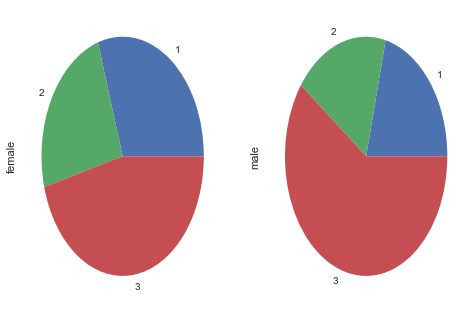

In [8]:
#Titanic_data_Maior_idade.groupby('Sex')['Pclass'].plot.pie(figsize=(6, 6))
Figura=pd.DataFrame({'female': [0,0,0],'male':[0,0,0]})
def Conta_Classe_Se_Genero(Classe,Genero):
    Figura.loc[Classe,Genero]+=1
    return 0
Titanic_data_Maior_idade.apply(lambda row: Conta_Classe_Se_Genero(row['Pclass']-1,row['Sex']), axis= 1)
Figura.index+=1
Figura.plot.pie(subplots=True,legend=False)

Como nota-se no gráfico. As mulheres eram maioria na primeira classe. Logo isso pode ter ajudado elas terem sobrevivido. Porém a diferença é pouca. Antes de analisar isso irei executar o mesmo grafico para crianças. Lembrando que True significa que é maior de idade.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b782ed750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6b74dbee10>], dtype=object)

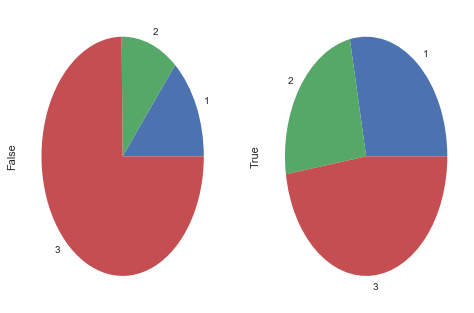

In [9]:
Figura=pd.DataFrame({False: [0,0,0],True:[0,0,0]})
Titanic_data_Maior_idade.apply(lambda row: Conta_Classe_Se_Genero(row['Pclass']-1,row['Age']), axis= 1)
Figura.index+=1
Figura.plot.pie(subplots=True,legend=False)


ou seja. Em nossos dados tinhamos muitas crianças na terceira classe. O que com grande possibilidade alterou nosso resultado. Irei fazer a analise por classe tanto para a idade quanto para o sexo para ver se há diferenças nos resultados. Para simplificar a questão me basearei na terceira e primeira classe.

In [19]:
print Titanic_data_Maior_idade.groupby(['Age','Pclass'])['Survived'].mean()
print Titanic_data_Maior_idade.groupby(['Sex','Pclass'])['Survived'].mean()

Age    Pclass
False  1         0.500000
       2         0.750000
       3         0.293478
True   1         0.653846
       2         0.423077
       3         0.211726
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


O comportamento para o sexo é o esperado. Nota-se a grande queda da sobrevivência de mulheres da terceira classe. Mas o comportamento da idade foi muito estranho. Irei plotar o Tamanho das amostras em busca de informação.

In [21]:
print Tamanho_Amostra(['Age','Pclass'])

Age    Pclass
False  1          34
       2          28
       3         184
True   1         182
       2         156
       3         307
Name: Survived, dtype: int64


os dados das crianças de primeira e segunda classe são poucos. Talvez explique porquê crianças de segunda classe tiveram mais salvação do que as de primeira. Imagino que seja por elas terem as mães presentes e as da primeira estarem mais com as babás. Analisando os  dados Parch junto com a idade:


In [41]:
print Titanic_data_Maior_idade.groupby(['Age','Pclass','Parch'])['Survived'].mean()


Age    Pclass  Parch
False  1       0        0.448276
               1        1.000000
               2        0.750000
       2       0        0.363636
               1        1.000000
               2        1.000000
       3       0        0.266667
               1        0.483871
               2        0.212121
True   1       0        0.641791
               1        0.666667
               2        0.764706
               4        0.000000
       2       0        0.357724
               1        0.619048
               2        0.700000
               3        1.000000
       3       0        0.206897
               1        0.208333
               2        0.400000
               3        0.333333
               4        0.000000
               5        0.200000
               6        0.000000
Name: Survived, dtype: float64


nota-se uma correlação positiva entre haver pais e a chance de viver. Irei olhar o tamanho agora para verificar minha hipótese.

In [42]:
print Tamanho_Amostra(['Age','Pclass','Parch'])

Age    Pclass  Parch
False  1       0         29
               1          1
               2          4
       2       0         11
               1         11
               2          6
       3       0        120
               1         31
               2         33
True   1       0        134
               1         30
               2         17
               4          1
       2       0        123
               1         21
               2         10
               3          2
       3       0        261
               1         24
               2         10
               3          3
               4          3
               5          5
               6          1
Name: Survived, dtype: int64


Como esperado na primeira classe há muito mais crianças sem pais presentes que na segunda. O q talvez explique os dados trocados. Porém houve uma supresa com a terceira classe. Era mais comum nela mandar crianças só com babá do que foi imaginado.

Como uma última análise. Vou refazer a análise de salvação das crianças. Analisando somente crianças que tinham 1 ou 2 país abordo.